In [1]:
# Project name : NLP Patient Condition Classification
# Objective : Analyze patient condition based on reviews of respective drugs
# We will be focussing on Depression, High Blood Pressure and Diabetes Type 2

**Import necessary libraries**



In [2]:
import pandas as pd
import itertools
import string
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', None)

**Import dataset**

In [3]:
df = pd.read_csv('drugsCom_raw.tsv', sep = '\t')

In [4]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
df.tail()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9.0,"December 13, 2014",116


In [6]:
df.shape

(161297, 7)

In [7]:
df.condition.value_counts().head()

condition
Birth Control    28788
Depression        9069
Pain              6145
Anxiety           5904
Acne              5588
Name: count, dtype: int64

**Filtered data based on Depression, High Blood Pressure and Diabetes Type 2**

In [8]:
df = df[(df['condition']=='Depression') | (df['condition']=='High Blood Pressure') | (df['condition']=='Diabetes, Type 2')]

In [9]:
df.shape

(13944, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13944 entries, 11 to 161290
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   13944 non-null  int64  
 1   drugName     13944 non-null  object 
 2   condition    13944 non-null  object 
 3   review       13944 non-null  object 
 4   rating       13944 non-null  float64
 5   date         13944 non-null  object 
 6   usefulCount  13944 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 871.5+ KB


In [11]:
x = df.drop(['Unnamed: 0','drugName','rating','date','usefulCount'],axis=1)

**EDA**

In [12]:
x.condition.value_counts()

condition
Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: count, dtype: int64

In [13]:
x.head()

,condition,review
11,Depression,"""I have taken anti-depressants for years, with..."
31,Depression,"""1 week on Zoloft for anxiety and mood swings...."
44,Depression,"""my gp started me on Venlafaxine yesterday to ..."
50,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l..."
67,Depression,"""This medicine saved my life. I was at my wits..."


**Segregating dataframe for analyzing individual condition**

In [14]:
x_dep = x[(x['condition'] == 'Depression')]
x_bp = x[(x['condition'] == 'High Blood Pressure')]
x_diab = x[(x['condition'] == 'Diabetes, Type 2')]

**Word cloud for Depression**

In [15]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(x_dep.review))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word Cloud for Depression', fontsize = 14)

Text(0.5, 1.0, 'Word Cloud for Depression')

**Word cloud for High Blood Pressure**

In [16]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(x_bp.review))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word Cloud for High Blood Pressure', fontsize = 14)

Text(0.5, 1.0, 'Word Cloud for High Blood Pressure')

**Word cloud for Diabetes, Type 2**

In [17]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(x_diab.review))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word Cloud for Diabetes, Type 2', fontsize = 14)

Text(0.5, 1.0, 'Word Cloud for Diabetes, Type 2')

**Data pre-processing**

In [18]:
for i, col in enumerate(x.columns):
  x.iloc[:, i] = x.iloc[:, i].str.replace('"', '')

In [19]:
x.head()

,condition,review
11,Depression,"I have taken anti-depressants for years, with ..."
31,Depression,1 week on Zoloft for anxiety and mood swings. ...
44,Depression,my gp started me on Venlafaxine yesterday to h...
50,"Diabetes, Type 2","Hey Guys, It&#039;s been 4 months since my la..."
67,Depression,This medicine saved my life. I was at my wits ...


In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Stopwords**

In [21]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**Lemmatization**

In [22]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [23]:
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [24]:
from bs4 import BeautifulSoup
import re

In [25]:
def review_to_words(raw_review):

  # 1. Delete HTML
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()

  # 2. Make a space
  letters_only = re.sub('[^a-zA-Z]', ' ', review_text)

  # 3. Lower letters
  words = letters_only.lower().split()

  # 4. Stopwords
  meaningful_words = [w for w in words if not w in stop]

  # 5. Lemmatization
  lemmatize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]

  # 6. Space join words
  return(' '.join(lemmatize_words))


In [26]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
x['review_clean'] = x['review'].apply(review_to_words)

C:\Users\Dell\AppData\Local\Temp\ipykernel_18616\91131721.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [28]:
x.head()

,condition,review,review_clean
11,Depression,"I have taken anti-depressants for years, with ...",taken anti depressant year improvement mostly ...
31,Depression,1 week on Zoloft for anxiety and mood swings. ...,week zoloft anxiety mood swing take mg morning...
44,Depression,my gp started me on Venlafaxine yesterday to h...,gp started venlafaxine yesterday help depressi...
50,"Diabetes, Type 2","Hey Guys, It&#039;s been 4 months since my la...",hey guy month since last post wanted give mont...
67,Depression,This medicine saved my life. I was at my wits ...,medicine saved life wit end anti depressant re...


In [29]:
# Drugs condition

condition_DName = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_DName[0:20].plot(kind="bar",# Specify the plot type as a bar chart.
                           figsize = (14,6),# Set the size of the plot (14 inches wide, 6 inches tall).
                           fontsize = 10,# Set the font size for the axis tick labels.
                           color="olive") # Set the color of the bars to olive green.

plt.xlabel("",fontsize = 20)  # Customize the x-axis label (currently left blank) and set its font size
plt.ylabel("",fontsize = 20)  # Customize the y-axis label (currently left blank) and set its font size
plt.title("Drugs condition", fontsize = 20)  # Add a title to the plot and set its font size.

Text(0.5, 1.0, 'Drugs condition')

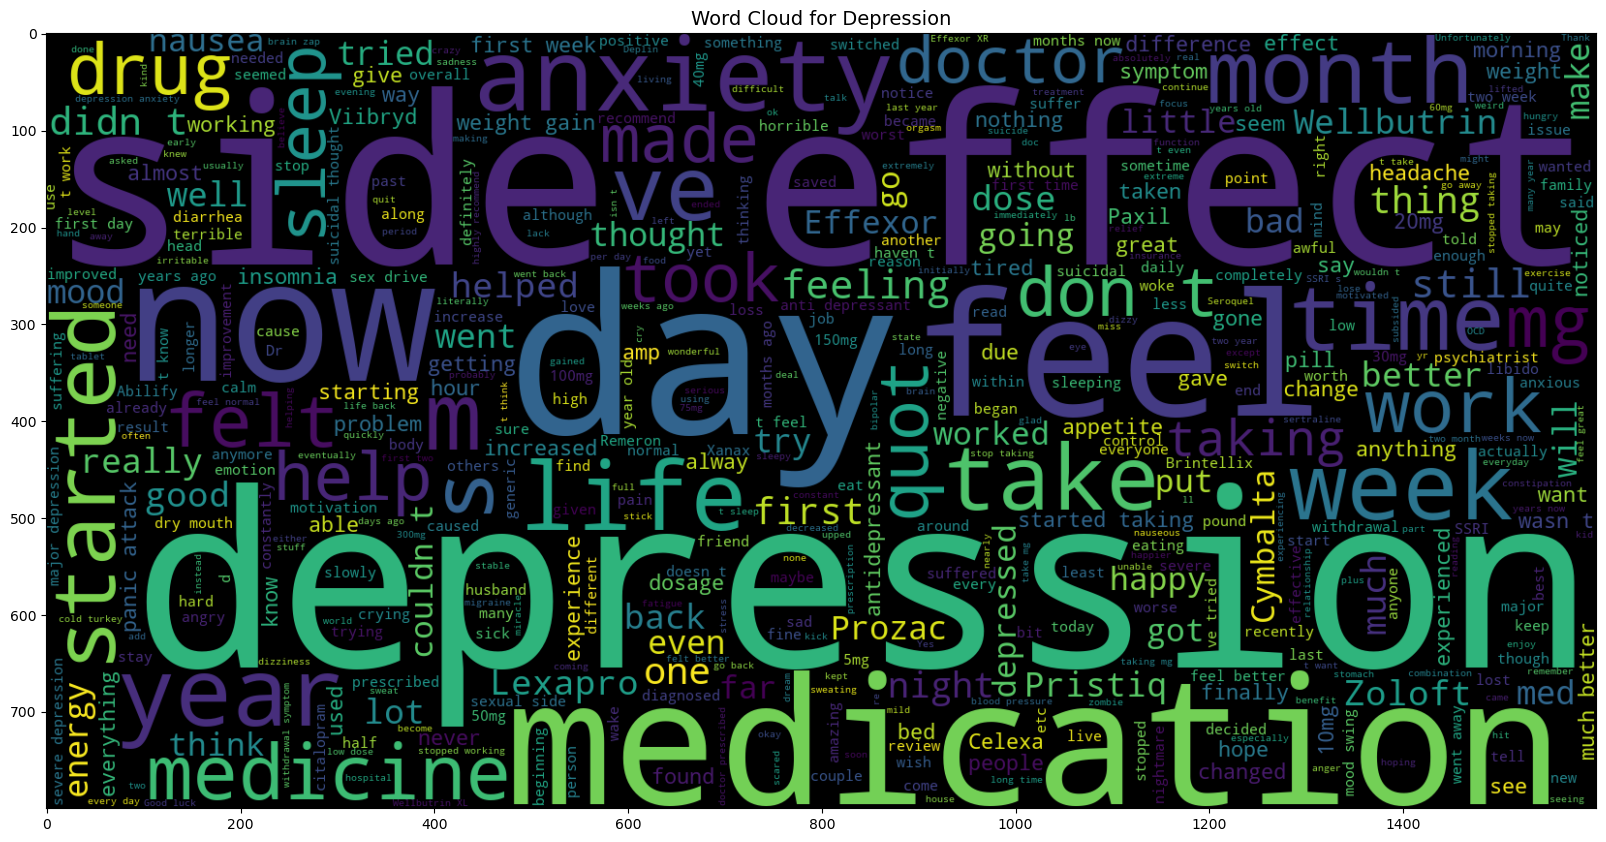

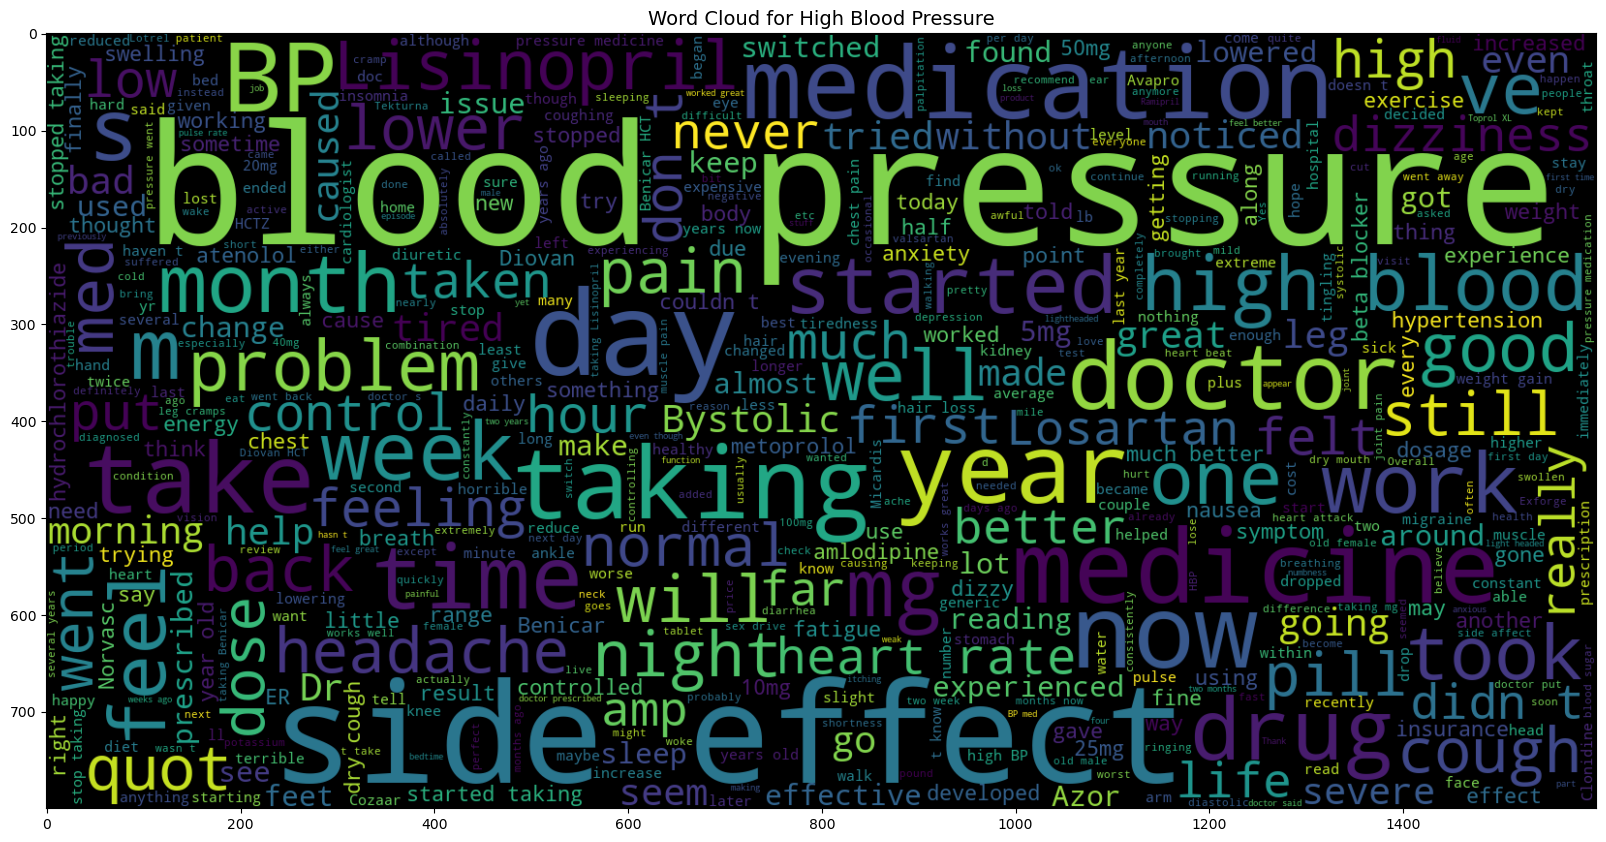

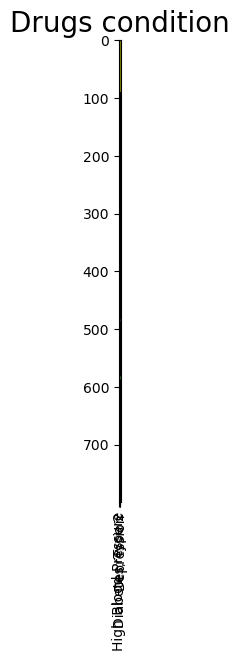

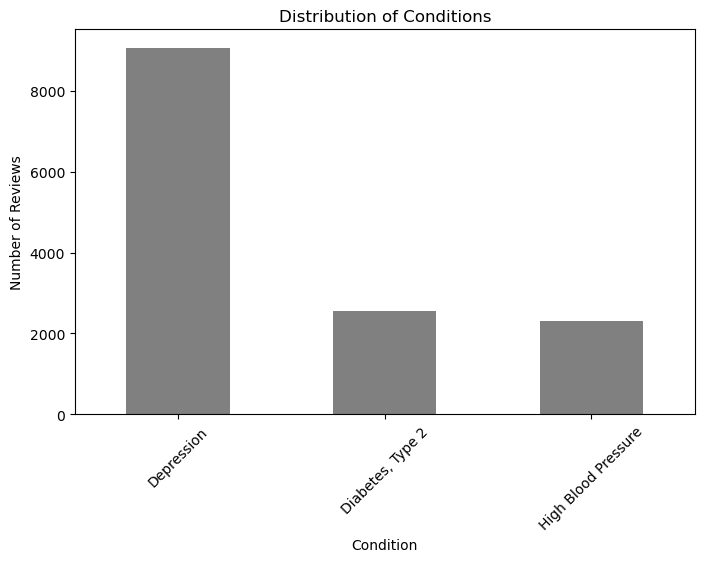

In [30]:
# Distribution of conditions

condition_counts = x['condition'].value_counts()
plt.figure(figsize=(8, 5))
condition_counts.plot(kind='bar', color='grey')
plt.title('Distribution of Conditions')
plt.xlabel('Condition')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

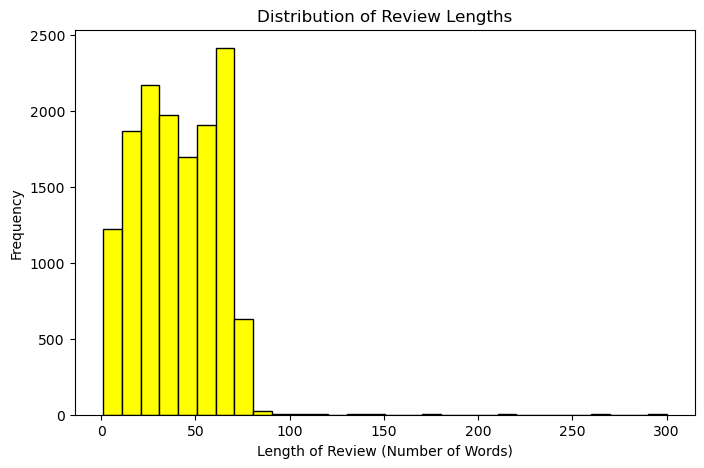

In [31]:
# Length of Reviews

x['review_length'] = x['review_clean'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
plt.hist(x['review_length'], bins=30, color='yellow', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review (Number of Words)')
plt.ylabel('Frequency')
plt.show()

In [32]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

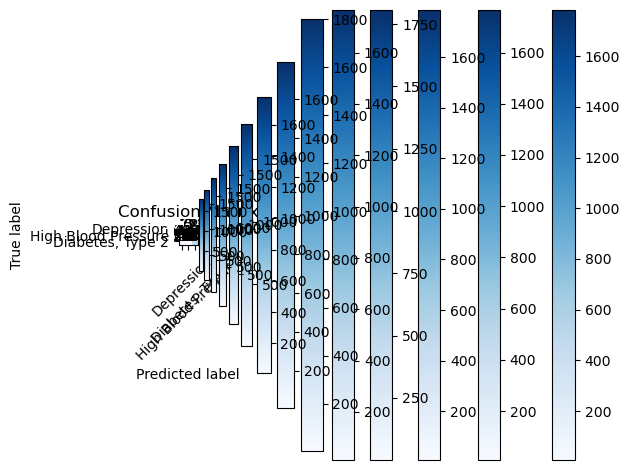

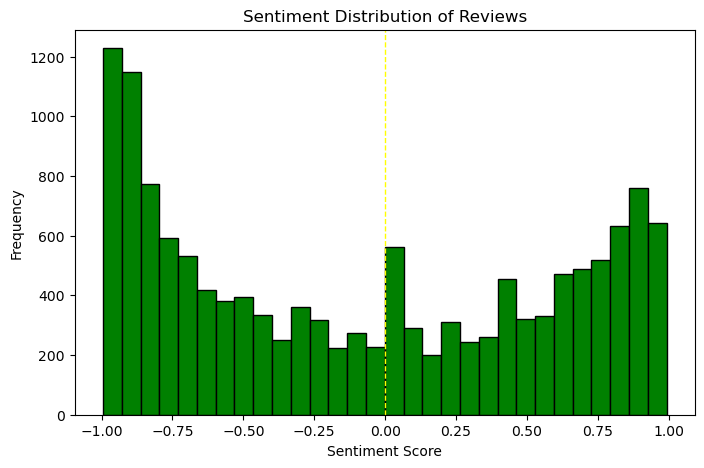

In [81]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
x['sentiment'] = x['review_clean'].apply(lambda x: sia.polarity_scores(x)['compound'])

plt.figure(figsize=(8, 5))
plt.hist(x['sentiment'], bins=30, color='green', edgecolor='black')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(0, color='yellow', linestyle='dashed', linewidth=1)  # Add a vertical line at 0
plt.show()

**Creating features and target variable**

In [112]:
x_feat = x.iloc[:,-3]
y = x.iloc[:,0]

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x_feat, y, stratify=y, test_size=0.2, random_state=0)

In [114]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion Matrix without normalization')

  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

**Bag of words**

In [115]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(x_train)

count_test = count_vectorizer.transform(x_test)

count_train

<11155x11177 sparse matrix of type '<class 'numpy.int64'>'
	with 328611 stored elements in Compressed Sparse Row format>

**Naive Bayes Model**

In [116]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Naive Bayes Accuracy : %0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Naive Bayes Accuracy : 0.956
Confusion Matrix without normalization


**Passive Aggressive Classifier**

In [117]:
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Passive Aggressive Accuracy : %0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Passive Aggressive Accuracy : 0.951
Confusion Matrix without normalization


LogisticRegression

In [118]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(count_train,y_train)
pred = logistic.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Logistic Regression accuracy :%0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Logistic Regression accuracy :0.959
Confusion Matrix without normalization


RandomForestClassifier

In [119]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(count_train,y_train)
pred = random.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Random Forest accuracy :%0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Random Forest accuracy :0.967
Confusion Matrix without normalization


DecisionTreeClassifier

In [120]:
from sklearn.tree import DecisionTreeClassifier

decision = DecisionTreeClassifier()
decision.fit(count_train,y_train)
pred = decision.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Decision Tree accuracy :%0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Decision Tree accuracy :0.942
Confusion Matrix without normalization


GradientBoostingClassifier

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier(learning_rate=0.1)
gradient.fit(count_train,y_train)
pred = gradient.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Gradient Boosting accuracy :%0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Gradient Boosting accuracy :0.932
Confusion Matrix without normalization


**TFIDF**

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(x_train)
tfidf_test_2 = tfidf_vectorizer.transform(x_test)

**Naive Bayes using TFIDF**

In [123]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print('Naive Bayes Accuracy : %0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Naive Bayes Accuracy : 0.947
Confusion Matrix without normalization


**Passive Agressive Classifier using TFIDF**

In [124]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

passive = PassiveAggressiveClassifier()
passive.fit(tfidf_train, y_train)
pred = passive.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print('Passive Aggressive Accuracy : %0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Passive Aggressive Accuracy : 0.961
Confusion Matrix without normalization


**TFIDF Bigrams**

In [125]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer.fit_transform(x_train)
tfidf_test_2 = tfidf_vectorizer.transform(x_test)

passive = PassiveAggressiveClassifier()
passive.fit(tfidf_train_2, y_train)
pred = passive.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print('Passive Aggressive Accuracy : %0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Passive Aggressive Accuracy : 0.961
Confusion Matrix without normalization


**TFIDF Trigrams**

In [126]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer.fit_transform(x_train)
tfidf_test_3 = tfidf_vectorizer.transform(x_test)

passive = PassiveAggressiveClassifier()
passive.fit(tfidf_train_3, y_train)
pred = passive.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print('Passive Aggressive Accuracy : %0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Passive Aggressive Accuracy : 0.961
Confusion Matrix without normalization


**Feature engineering**

In [127]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
  labelid = list(classifier.classes_).index(classlabel)
  feature_names = vectorizer.get_feature_names_out()
  topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

  for coef, feat in topn:
    print(classlabel, feat, coef)

In [128]:
# Depression features

most_informative_feature_for_class(tfidf_vectorizer,passive,'Depression')

Depression cymbalta 4.799357828428228
Depression viibryd 4.811707204054935
Depression lexapro 5.245472858272767
Depression effexor 5.253413847535795
Depression mood 5.402015094504511
Depression antidepressant 5.429713834834606
Depression zoloft 5.84829025479034
Depression wellbutrin 7.932807532422024
Depression pristiq 8.677969840139985
Depression depression 11.89419727530242


In [129]:
# High Blood Pressure features

most_informative_feature_for_class(tfidf_vectorizer,passive,'High Blood Pressure')

High Blood Pressure metoprolol 4.216511259809732
High Blood Pressure atenolol 4.265339232797842
High Blood Pressure losartan 4.759457436807651
High Blood Pressure amlodipine 4.780357451442978
High Blood Pressure benicar 4.8656408023047355
High Blood Pressure bystolic 5.3306370870565285
High Blood Pressure lisinopril 6.194692274512122
High Blood Pressure cough 6.515722536049091
High Blood Pressure bp 7.354766966915188
High Blood Pressure pressure 9.019262297857061


In [130]:
# Diabetes, Type 2 features

most_informative_feature_for_class(tfidf_vectorizer,passive,'Diabetes, Type 2')

Diabetes, Type 2 lantus 4.2646746058302165
Diabetes, Type 2 shot 4.36791649706983
Diabetes, Type 2 byetta 4.490702628680757
Diabetes, Type 2 trulicity 5.282259938494959
Diabetes, Type 2 januvia 5.285980337947146
Diabetes, Type 2 invokana 5.438829703531792
Diabetes, Type 2 injection 6.300001088104178
Diabetes, Type 2 metformin 7.0558321283423435
Diabetes, Type 2 victoza 7.577578212050677
Diabetes, Type 2 sugar 8.439955131597875


Here we choose random forest for deployment

In [138]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(count_train,y_train)
pred = model.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Random Forest accuracy :%0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Random Forest accuracy :0.967
Confusion Matrix without normalization


In [137]:
import joblib

with open('random.pkl', 'wb') as f:
    joblib.dump(model, f)

NameError: name 'model' is not defined